Importando bibliotecas e definindo parâmetros.

In [19]:
#Bibliotecas que serão utilizadas ao longo do exercício
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

#Parâmetros
l0 = 0.205 # comprimento do pendulo(m) 
m = 0.01122 # massa da esfera (kg)
ρ = 1 # densidade do ar (kg/m^3)
r = 0.007 # raio da esfera (m)
g = 10 # aceleração gravitacional (m/s^2)
Cd = 0.47 # coeficiente de arrasto (adimensional)
A = pi * (r ** 2)  #área da secção transversal da esfera (m^2)

#lista de tempo
t_lista = np.arange(0, 10, 1e-3)  

#condições iniciais 

######## nao usamos essa posição de verdade
x_0 = -l0
y_0 = 0
vx_0 = 0
vy_0 = 0

Implementando a função 'pendulo'.

In [20]:
def pendulo(a, t):
    x = a[0]
    y = a[1]
    vx = a[2]
    vy = a[3]
    v = sqrt(vx ** 2 + vy ** 2)
    if v > 0:
        cos_alpha = vx/v
        sen_alpha = vy/v
    else:
        sen_alpha = 0
        cos_alpha = 0
    sen_theta = x/l0
    cos_theta = -y/l0
    Fa = ρ * A * Cd * (v ** 2) * 0.5     # Força de resistência do ar ()
    T = m*v**2/l0 + m*g*cos_theta        #tração (N)
    dxdt = vx
    dydt = vy
    dvxdt = (-T * sen_theta - Fa * cos_alpha) / m
    dvydt = ( T * cos_theta - Fa * sen_alpha) / m - g
    dadt = [dxdt, dydt, dvxdt, dvydt]
    return dadt

Implementando o gráfico da trajetória.

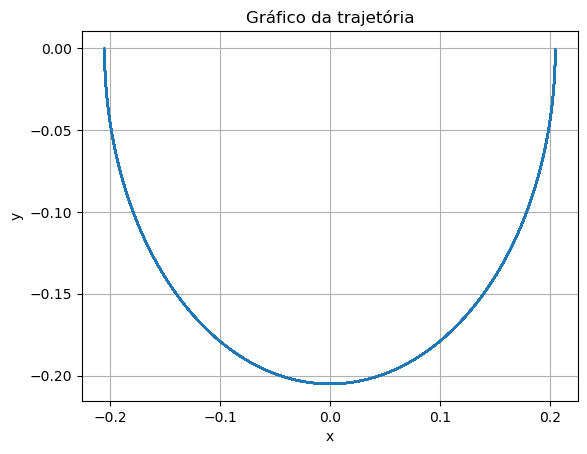

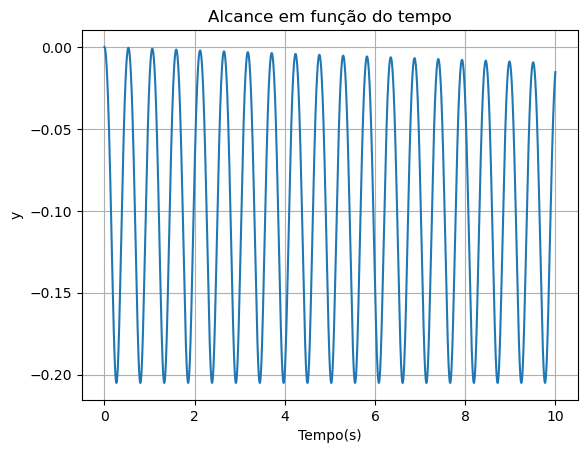

In [21]:
a_0 = [x_0, y_0, vx_0, vy_0]
a_lista = odeint(pendulo, a_0, t_lista)

plt.plot(a_lista[:,0], a_lista[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico da trajetória')
plt.grid(True)
plt.show()

plt.plot(t_lista, a_lista[:, 1])
plt.xlabel('Tempo(s)')
plt.ylabel('y')
plt.title('Alcance em função do tempo')
plt.grid(True)
plt.show()

In [23]:
#gráficos conclusivos

